# Visualizations of P-Nodes
Includes visualizations for p-nodes of different statuses. Status $=1$ means the p-node participated in the network, while Status $=0$ means it did not participate.

In [1]:
import xlrd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

from pq_helper import get_dataframe

Helper function for plotting:

In [86]:
def annotated_bar_chart(x_axis, y_axis, labels, shift, x_label, y_label, title, rot=0):
    index = np.arange(len(x_axis))
    plt.figure()
    df = pd.DataFrame({x_label: x_axis, y_label: y_axis})
    ax = df.plot.bar(rot=0)
    plt.xlabel('%s' % x_label, fontsize=10)
    plt.ylabel('%s' % y_label, fontsize=10)
    plt.xticks(index, x_axis, fontsize=10, rotation=rot)
    plt.yticks(fontsize=10)
    plt.title('%s' % title)
    counter = 0
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() * shift, i.get_height(), 
                labels[counter])
        counter += 1
    plt.show() 

First, load in the data:

In [3]:
data_path = 'data/'
path = os.path.join(data_path, 'acm95a100a2018_anonymized_modified.xlsx')
(p_nodes, q_nodes, links, mod_p_nodes) = get_dataframe(path)

In [4]:
p_nodes

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,In-Degree,Out-Degree,Seniority
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B+,0,0,0,U
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A+,1,1,5,U
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A+,1,4,4,U
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A+,1,0,3,U
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A+,1,20,9,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P192,TA,NaN,NaN,8.0,59,88,1,0,0,0,NaN,NaN,1,0,1,N
192,P193,TA,NaN,NaN,9.0,78,34,0,0,0,0,NaN,NaN,1,0,1,N
193,P194,TA,NaN,NaN,10.0,36,53,3,0,2,1,NaN,NaN,0,0,0,N
194,P195,Head TA,NaN,NaN,NaN,74,237,228,0,7,153,NaN,NaN,1,0,125,N


In [5]:
mod_p_nodes

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,Option2,In-Degree,Out-Degree,Seniority
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B,0,ME,0.0,0.0,U
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A,1,Other,1.0,5.0,U
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A,1,Other,4.0,4.0,U
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A,1,Other,0.0,3.0,U
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A,1,ME,20.0,9.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P192,TA,NaN,NaN,8.0,59,88,1,0,0,0,NaN,NaN,1,Other,NaN,NaN,N
192,P193,TA,NaN,NaN,9.0,78,34,0,0,0,0,NaN,NaN,1,Other,NaN,NaN,N
193,P194,TA,NaN,NaN,10.0,36,53,3,0,2,1,NaN,NaN,0,Other,NaN,NaN,N
194,P195,Head TA,NaN,NaN,NaN,74,237,228,0,7,153,NaN,NaN,1,Other,NaN,NaN,N


Set up lists of options, classes, grades, and seniorities:

In [12]:
options = ['ACM', 'AM', 'APh', 'Ae', 'AsPh', 'BE', 'BMB', 'Bi', 'CS', 'Ch', 
            'ChE', 'ChE (BM)', 'ChE (Env)', 'ChE (MS)', 'ChE (PS)', 'EE', 
            'Eng', 'Eng (CNS)', 'Ge', 'ME', 'MS', 'MedE', 'Ph', 'PlSc', 'SE']
combined_options = ['ACM', 'AM', 'APh', 'Ae', 'AsPh', 'BE', 'BMB', 'Bi', 
                    'CS', 'Ch', 'ChE', 'EE', 'Eng', 'Ge', 'ME', 'MS', 
                    'MedE', 'Ph', 'PlSc', 'SE']    
classes = ['U2', 'U3', 'U4', 'G1', 'G2', 'G5']   
grades = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+']  
combined_grades = ['A', 'B', 'C', 'D']
levels = ['Undergraduate', 'Graduate']

We will first examine the number of students from each class with Status $=1$:

In [75]:
df = pd.crosstab(p_nodes['Class'], p_nodes['Status'])
df['1 %'] = (100 * df[1] / (df[0] + df[1])).round(1)
df['1 %'] = df['1 %'].apply(lambda x: str(x) + '%')
df

Status,0,1,1 %
Class,,,
G1,28,26,48.1%
G2,1,1,50.0%
G5,0,1,100.0%
U2,41,43,51.2%
U3,23,16,41.0%
U4,0,4,100.0%


We will use this information to plot the number of students with Status $=1$ across different classes and seniorities. Note: the percentage annotations above each bar refer to percentage of students within a class that have Status $=1$, not the percentage of total students with Status $=1$ that fall within a class.

<Figure size 432x288 with 0 Axes>

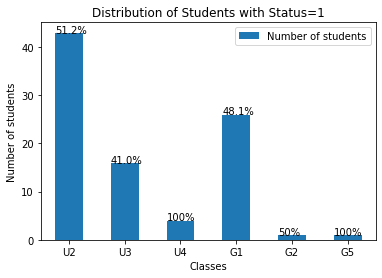

<Figure size 432x288 with 0 Axes>

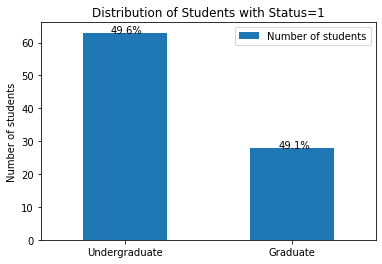

In [67]:
class_statuses = [43, 16, 4, 26, 1, 1]
percentages = ['51.2%', '41.0%', '100%', '48.1%', '50%', '100%']

annotated_bar_chart(classes, class_statuses, percentages, 0, 'Classes', 
                    'Number of students', 
                    'Distribution of Students with Status=1') 
    
level_statuses = [63, 28] 
percentages = ['49.6%', '49.1%']
    
annotated_bar_chart(levels, level_statuses, percentages, 1/3, '', 
        'Number of students', 
        'Distribution of Students with Status=1')

About half of all undergrads and half of all grads participated in the network. Out of the three most populous classes, `U2, U3, G1`, about half the students from each class participated. 

We can look at similar plots based on option:

In [96]:
df = pd.crosstab(mod_p_nodes['Option'], mod_p_nodes['Status'])
df['1 %'] = (100 * df[1] / (df[0] + df[1])).round(1)
df['1 %'] = df['1 %'].apply(lambda x: str(x) + '%')
df

Status,0,1,1 %
Option,,,
ACM,0,7,100.0%
AM,1,0,0.0%
APh,2,2,50.0%
Ae,1,5,83.3%
AsPh,4,3,42.9%
BE,3,4,57.1%
BMB,0,1,100.0%
Bi,0,1,100.0%
CS,1,2,66.7%


Based on the above, we obtain the following:

<Figure size 432x288 with 0 Axes>

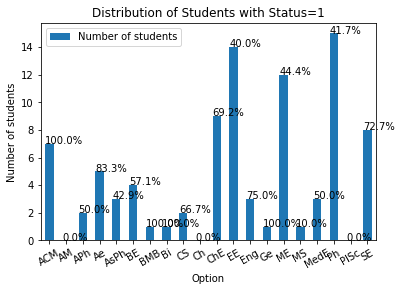

In [97]:
annotated_bar_chart(combined_options, df[1], df['1 %'], 0, 
        'Option', 'Number of students', 
        'Distribution of Students with Status=1', rot=30) 

We observe that ACM majors had a high rate of participation, as all 7 students had Status $=1$. The Ae, Eng, ChE, and SE majors also had high rates of participation abong those with at least 6 students. Some options with the lowest rates of participation include EE and Ph. Some of the options with very few students, including AM, Ch, and PlSc, also had no participation. 

Finally, we can examine the same plots across grades:

In [104]:
df = pd.crosstab(p_nodes['Grade'], mod_p_nodes['Status'])
df['1 %'] = (100 * df[1] / (df[0] + df[1])).round(1)
df['1 %'] = df['1 %'].apply(lambda x: str(x) + '%')
df      

Status,0,1,1 %
Grade,,,
A,31,33,51.6%
A+,16,37,69.8%
A-,17,13,43.3%
B,6,1,14.3%
B+,13,2,13.3%
B-,5,2,28.6%
C,2,1,33.3%
C+,1,1,50.0%
C-,2,0,0.0%


<Figure size 432x288 with 0 Axes>

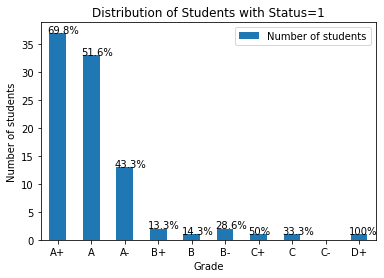

In [105]:
grade_statuses = [37, 33, 13, 2, 1, 2, 1, 1, 0, 1] 
percentages = ['69.8%', '51.6%', '43.3%', '13.3%', '14.3%', '28.6%', '50%', 
               '33.3%', '', '100%']
    
annotated_bar_chart(grades, grade_statuses, percentages, -0.1, 
                    'Grade', 'Number of students', 
                    'Distribution of Students with Status=1')     

We observe that the percentage of participating p-nodes is higher than average for students who received an A+, and about average for those who received an A. Participation is slightly below average for those who received A- grades, and much lower than average for those who received grades in the B range. For students in the C or D range, the overall number of students is small, so the percentages do not give much insight. 

We can also plot the same graph without $\pm$ grades:

In [106]:
df = pd.crosstab(mod_p_nodes['Grade'], mod_p_nodes['Status'])
df['1 %'] = (100 * df[1] / (df[0] + df[1])).round(1)
df['1 %'] = df['1 %'].apply(lambda x: str(x) + '%')
df 

Status,0,1,1 %
Grade,,,
A,64,83,56.5%
B,24,5,17.2%
C,5,2,28.6%
D,0,1,100.0%


<Figure size 432x288 with 0 Axes>

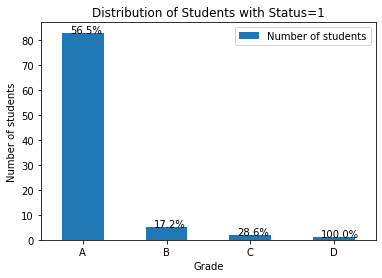

In [107]:
annotated_bar_chart(combined_grades, df[1], df['1 %'], 1/5, 
         'Grade', 'Number of students', 
        'Distribution of Students with Status=1')  

This confirms what we observed above: the participation rate is much higher for students who scored in the A range compared to those who scored in the B range. This suggests that more participation in the collaboration network helped students perform better in the course. We speculate that this could be in part because those who asked more questions ended up learning the material better, or because those who knew the material better ended up answering more questions. 

In summary, about $50\%$ of all students participated in the network. Some options, like the ACM option, participated more than others. In particular, students who received A grades participated more than students who received B grades. 

### Attributions

Notebook created by Amanda Li. 

Modified from `visualizations_p_nodes_status.py` by Amanda Li.